# Linear Regression with single Variable

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model

In [2]:
df = pd.read_csv('homeprices.csv')

In [3]:
df

,area,price
0,2600,550000
1,3000,565000
2,3200,610000
3,3600,680000
4,4000,725000


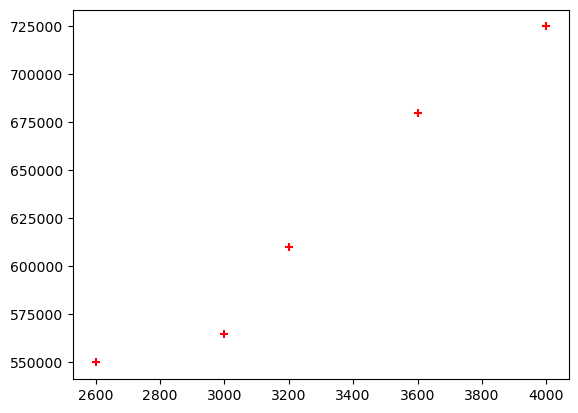

In [7]:
%matplotlib inline
plt.scatter(df.area,df.price,color = 'red', marker = "+")

In [8]:
reg = linear_model.LinearRegression()
reg.fit(df[['area']],df.price)

LinearRegression()

In [10]:
reg.predict([[3422]])

/home/nikhil/anaconda3/envs/env_ml/lib/python3.7/site-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


array([645281.84931507])

In [13]:
reg.coef_
reg.intercept_

180616.43835616432

In [14]:
df2 = pd.read_csv('areas.csv')
df2

,area
0,1000
1,1500
2,2300
3,3540
4,4120
5,4560
6,5490
7,3460
8,4750
9,2300


In [16]:
predictions = reg.predict(df2)

In [17]:
df2["prices"] = predictions

In [18]:
df2

,area,prices
0,1000,3.164041e+05
1,1500,3.842979e+05
2,2300,4.929281e+05
3,3540,6.613048e+05
4,4120,7.400616e+05
5,4560,7.998082e+05
6,5490,9.260908e+05
7,3460,6.504418e+05
8,4750,8.256079e+05
9,2300,4.929281e+05


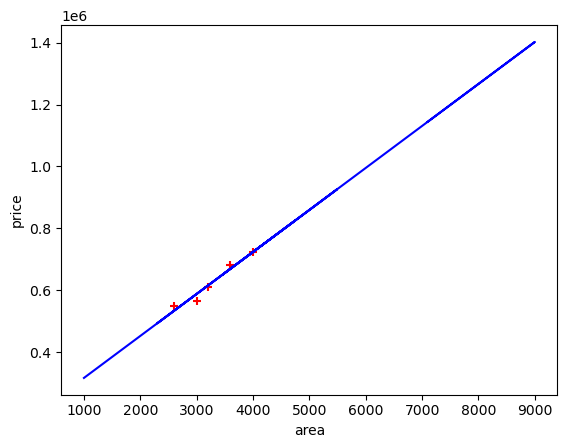

In [27]:
%matplotlib inline
plt.xlabel("area")
plt.ylabel("price")
plt.scatter(df.area,df.price,color = 'red', marker = "+")
plt.plot(df2.area,predictions,color = 'blue')

## Excercise

In [31]:
df3 = pd.read_csv("canada_per_capita_income.csv")

reg = linear_model.LinearRegression()
reg.fit(df3[['year']],df3[["per capita income (US$)"]])


LinearRegression()

In [33]:
reg.predict([[2020]])

/home/nikhil/anaconda3/envs/env_ml/lib/python3.7/site-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


array([[41288.69409442]])

# Linear Regression with multiple variables

In [41]:
import pandas as pd
import numpy as np
from sklearn import linear_model
import math

In [42]:
df = pd.read_csv("homeprices.csv")

In [44]:
median_rooms = df.bedrooms.median()
median_rooms = math.floor(median_rooms)
median_rooms

4

In [45]:
df.bedrooms = df.bedrooms.fillna(median_rooms)

In [46]:
df

,area,bedrooms,age,price
0,2600,3.0,20,550000
1,3000,4.0,15,565000
2,3200,4.0,18,610000
3,3600,3.0,30,595000
4,4000,5.0,8,760000
5,4100,6.0,8,810000


In [47]:
reg = linear_model.LinearRegression()
reg.fit(df[["area","bedrooms","age"]],df.price)

LinearRegression()

In [49]:
reg.coef_

array([  112.06244194, 23388.88007794, -3231.71790863])

In [50]:
reg.intercept_

221323.00186540384

In [52]:
reg.predict([[5000,5,1]])

/home/nikhil/anaconda3/envs/env_ml/lib/python3.7/site-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


array([895347.89405714])

## Excercise

In [28]:
import sys
print(sys.prefix)
# !conda install --y -c conda-forge --prefix {sys.prefix} word2number
from word2number import w2n
import pandas as pd
import math
from sklearn import linear_model

/home/nikhil/anaconda3/envs/env_ml


In [29]:
df = pd.read_csv("hiring.csv")
df["experience"] = df.experience.fillna("zero")
df["experience"] = df["experience"].apply(lambda x: w2n.word_to_num(x))
mean_score = math.floor(df['test_score(out of 10)'].mean())
df["test_score(out of 10)"] = df["test_score(out of 10)"].fillna(mean_score)
df

,experience,test_score(out of 10),interview_score(out of 10),salary($)
0,0,8.0,9,50000
1,0,8.0,6,45000
2,5,6.0,7,60000
3,2,10.0,10,65000
4,7,9.0,6,70000
5,3,7.0,10,62000
6,10,7.0,7,72000
7,11,7.0,8,80000


In [36]:
reg = linear_model.LinearRegression()
reg.fit(df[["experience","test_score(out of 10)","interview_score(out of 10)"]].values,df["salary($)"].values)

LinearRegression()

In [40]:
# Solution
reg.predict([[2,9,6],[12,10,10]])

array([53713.86677124, 93747.79628651])

In [ ]:
%matplotlib inline
plt.xlabel("area")
plt.ylabel("price")
plt.scatter(df.area,df.price,color = 'red', marker = "+")
plt.plot(df2.area,predictions,color = 'blue')

# Dummy Variables and One Hot Encoding

In [1]:
import pandas as pd

df = pd.read_csv("homeprices2.csv")
df

,town,area,price
0,monroe township,2600,550000
1,monroe township,3000,565000
2,monroe township,3200,610000
3,monroe township,3600,680000
4,monroe township,4000,725000
5,west windsor,2600,585000
6,west windsor,2800,615000
7,west windsor,3300,650000
8,west windsor,3600,710000
9,robinsville,2600,575000


In [2]:
dummies_df = pd.get_dummies(df.town)
merged_df = pd.concat([df,dummies_df],axis=1)
merged_df.drop(["town","west windsor"],axis=1,inplace=True)
merged_df

,area,price,monroe township,robinsville
0,2600,550000,1,0
1,3000,565000,1,0
2,3200,610000,1,0
3,3600,680000,1,0
4,4000,725000,1,0
5,2600,585000,0,0
6,2800,615000,0,0
7,3300,650000,0,0
8,3600,710000,0,0
9,2600,575000,0,1


In [3]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
X = merged_df.drop("price",axis=1)
y = merged_df["price"]
model.fit(X,y)

LinearRegression()

In [6]:
model.predict([[2600,0,0]])
model.score(X,y)

/home/nikhil/anaconda3/envs/env_ml/lib/python3.7/site-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


0.9573929037221871

In [7]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [8]:
dfle = df.copy()
df.town = le.fit_transform(dfle.town)
df

,town,area,price
0,0,2600,550000
1,0,3000,565000
2,0,3200,610000
3,0,3600,680000
4,0,4000,725000
5,2,2600,585000
6,2,2800,615000
7,2,3300,650000
8,2,3600,710000
9,1,2600,575000


In [11]:
X = dfle[['town','area']].values
X

array([[   0, 2600],
       [   0, 3000],
       [   0, 3200],
       [   0, 3600],
       [   0, 4000],
       [   2, 2600],
       [   2, 2800],
       [   2, 3300],
       [   2, 3600],
       [   1, 2600],
       [   1, 2900],
       [   1, 3100],
       [   1, 3600]])

In [13]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder()